Image Data Analysis with LSTM
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5575 - loss: 1.3197
Epoch 1: accuracy improved from -inf to 0.74153, saving model to mnist_modellstm.keras
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 49ms/step - accuracy: 0.5579 - loss: 1.3186 - val_accuracy: 0.8962 - val_loss: 0.3327
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9170 - loss: 0.2764
Epoch 2: accuracy improved from 0.74153 to 0.92623, saving model to mnist_modellstm.keras
469/469 ━━━━━━━━━━━━━━━━━━━━ 32s 29ms/step - accuracy: 0.9171 - loss: 0.2763 - val_accuracy: 0.9396 - val_loss: 0.1973
Epoch 3/10
468/469 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9450 - loss: 0.1841
Epoch 3: accuracy improved from 0.92623 to 0.94915, saving model to mnist_modellstm.keras
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - accuracy: 0.9450 - loss: 0.1840 - val_accuracy: 0.9524 - val_loss: 0.1533
Epoch 4/10
467/469 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9583 - loss: 0.1376
Epoch 4: accuracy improved f

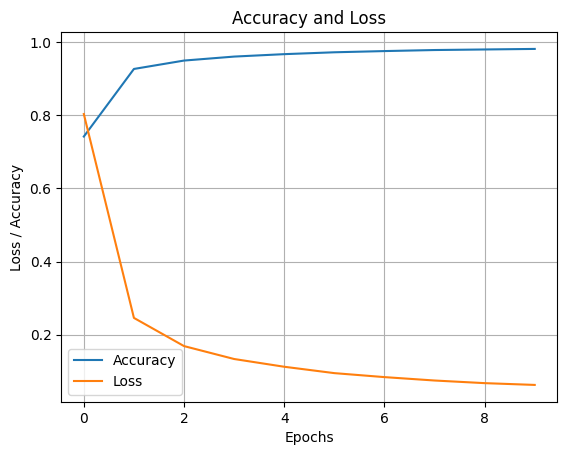

In [1]:

from keras import Sequential
from keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.datasets import mnist
from keras.layers import Dense, SimpleRNN, LSTM, GRU, Activation

print("Image Data Analysis with LSTM")

(xtrain, ytrain), (xtest,ytest) = mnist.load_data()

xtrain1 = xtrain
xtest1 = xtest

xtrain = xtrain/255.0
xtest = xtest/255.0
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

model = Sequential()
model.add(LSTM(50, input_shape=(28,28)))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
checkpoint=ModelCheckpoint('mnist_modellstm.keras', verbose=1, monitor='accuracy', save_best_only=True)
history = model.fit(xtrain, ytrain, batch_size=128, epochs=10, verbose=1, validation_data=(xtest, ytest), callbacks=[checkpoint] )

#Evaluation Metrics
scores = model.evaluate(xtest, ytest)
print("Loss")
print(scores[0])
print("Accuracy")
print(scores[1])

# graph
his = pd.DataFrame(history.history)
fig1 = plt.figure()
plt.plot(his['accuracy'], label="Accuracy")
plt.plot(his['loss'], label="Loss")
plt.legend()
plt.title("Accuracy and Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss / Accuracy")
plt.grid()
plt.show(fig1)

Enter a image sample id (0-9999):700


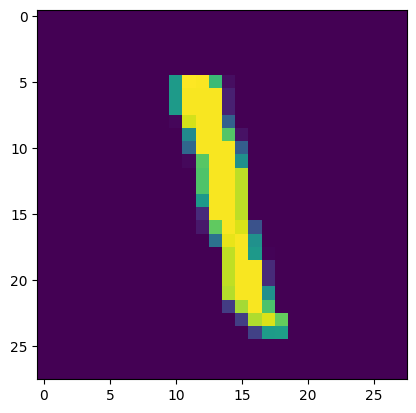

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
[[1.2730983e-06 9.9895680e-01 2.5398537e-04 1.3655279e-04 1.1854434e-04
  6.6532106e-05 1.0183704e-05 3.0438548e-05 3.2036196e-04 1.0532617e-04]]

The number is given below : 
[1]


In [2]:
# PREDICTION
from keras.models import load_model

# load model
model_pred_lmst = load_model("mnist_modellstm.keras")
#load data
(xtrain, ytrain), (xtest,ytest) = mnist.load_data()

n1 = int(input("Enter a image sample id (0-9999):"))

# display the image from the mnnist database below
fig1=plt.figure()
plt.imshow(xtest1[n1])
plt.show(fig1)

# Input
sample = xtest[n1].reshape((1, 28, 28)) / 255.0

target_sp =model_pred_lmst.predict(sample)
print(target_sp)
out = np.argmax(target_sp, axis=1)
print("\r\nThe number is given below : ")
print(out)